**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
- [**Scales**](#toc2_)    
- [**Ticks**](#toc3_)    
  - [*Get the ticks and ticklabels and set custom properties*](#toc3_1_)    
    - [*Format axis tick labels with custom functions*](#toc3_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from numpy.random import default_rng

rng = default_rng()

In [3]:
std_normal_data = rng.standard_normal((100))

# Plot customization: Axis Scales and Ticks

Each Axes has two (or three) Axis objects representing the x- and y-axis. These control the scale of the Axis, the tick locators and the tick formatters.

## <a id='toc2_'></a>[**Scales**](#toc0_)

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like loglog, semilogx, and semilogy.

To set the scale manually we use the `ax.set_xscale()` and, `ax.set_yscale()` methods.

In [4]:
xdata = np.arange(len(std_normal_data))
ydata = 10**std_normal_data

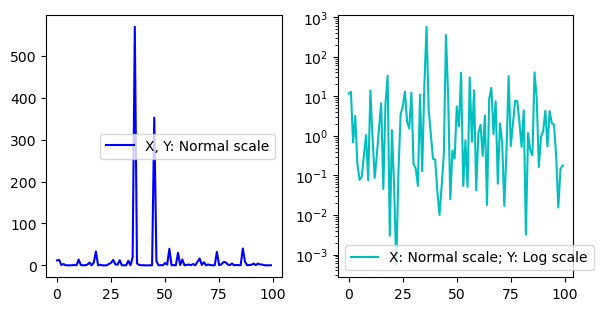

In [5]:
fig, [ax00, ax01] = plt.subplots(1, 2, figsize=(6, 3), layout="constrained")

line1 = ax00.plot(xdata, ydata, color="b")
line2 = ax01.plot(xdata, ydata, color="c")

ax01.set_yscale("log")

ax00.legend(["X, Y: Normal scale"])
ax01.legend(["X: Normal scale; Y: Log scale"])

plt.show()

**Note:** Even if we used `ax.twinx()` to create a second y-axis, we still could have used `ax.set_yscale()` on the twin axes instance to set the scale of the second y-axis.

## <a id='toc3_'></a>[**Ticks**](#toc0_)

Each Axis has a tick locator and formatter that choose where along the Axis objects to put tick marks and how to format the tick labels. A simple interface to this are the `ax.set_xticks(ticks, labels)` and `ax.set_yticks(ticks, labels)` methods.

**`Note:`** In case of Dates you may need to use some predefined formatter or custom formatter to accurately display the tick labels. See the documentation @https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html.

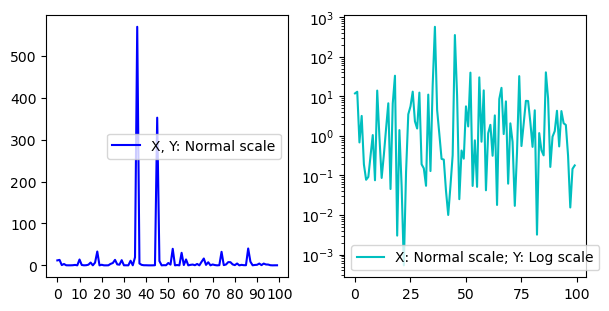

In [6]:
plt.sca(ax00)

ax00.set_xticks(ticks=np.arange(0, 110, 10), labels=np.arange(0, 110, 10))

plt.show()

### <a id='toc3_1_'></a>[*Get the ticks and ticklabels and set custom properties*](#toc0_)

We can obtain the ticks using the `ax.get_xticks()` and `ax.get_yticks()` methods. Also,we can use the `ax.tick_params(axis, which)` method to set some of the tick properties such as, *color, width, length, direction, labelsize, labelcolor, labelrotation, grid_color, grid_linestyle etc*.

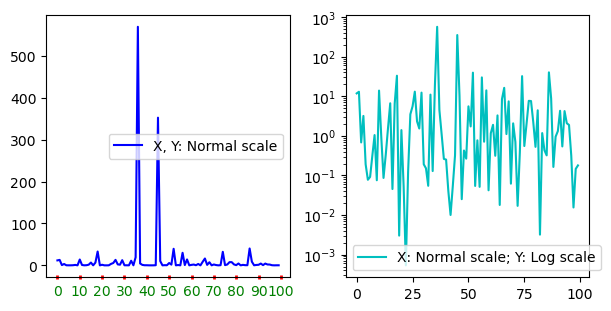

In [7]:
plt.sca(ax00)

plt.tick_params(
    "x", which="both", direction="inout", color="r", width=2, labelcolor="g"
)

plt.show()

We can also obtain the tick labels objects using the `ax.get_xticklabels()` and `ax.get_yticklabels()` methods. We can then use the `plt.setp(ticklabels_obj)` method to set some properties of these tick labels such as *rotation, horizontal and vertical allignment, color, fontfamily and other font properties etc*. 

**Note:** We could also use `ax.set_xticklabels()` or `ax.set_yticklabels()` to set some of the tick label properties.

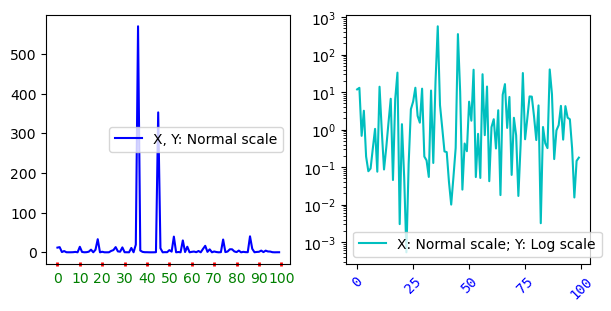

In [8]:
plt.sca(ax01)

xtick_labels = ax01.get_xticklabels()

plt.setp(
    xtick_labels,
    rotation=45,
    horizontalalignment="center",
    color="b",
    fontfamily="monospace",
)

plt.show()

#### <a id='toc3_1_1_'></a>[*Format axis tick labels with custom functions*](#toc0_)

For labels, we can specify custom formatting guidelines in the form of functions. When used with `ax.Axis.set_major_formatter(func)` or `ax.Axis.set_minor_formatter(func)`, they will automatically create and use a *ticker.FuncFormatter* class.

In [9]:
def xtick_formatter(tick_label, tick_pos):
    return str(tick_label) + " Hz"

For this function, the tick_label argument is the original tick label and tick_pos is the original tick position. We only used tick_label here but both arguments are needed.

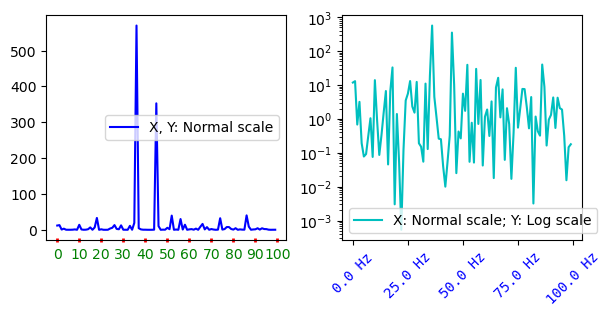

In [10]:
plt.sca(ax01)

# set the major formatter to the custom function
ax01.xaxis.set_major_formatter(xtick_formatter)

plt.show()